In [1]:
import pandas as pd
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_validate
from sklearn.metrics import roc_curve,auc
from sklearn.metrics import RocCurveDisplay

In [4]:
test=pd.read_csv('KITAI_Dataset_2/test/_annotations.csv')
train=pd.read_csv('KITAI_Dataset_2/train/_annotations.csv')
valid=pd.read_csv('KITAI_Dataset_2/valid/_annotations.csv')

In [5]:
def crop_image (image_path, xmin, xmax, ymin, ymax):
        im=cv.imread(image_path)
        crop_img=im[ymin:ymax, xmin:xmax]
        resize= cv.resize(crop_img, (10,10),interpolation=cv.INTER_AREA).flatten()
        return resize.tolist()

In [7]:
X_test=[]
Y_test=[]
for index,row in test.iterrows():
    X_test.append(crop_image('KITAI_Dataset_2/test/'+str(row['filename']),row['xmin'],row['xmax'],row['ymin'],row['ymax']))
    if row['class']=='cyanobacteria':
        Y_test.append(0)
    else:
        Y_test.append(1)


In [8]:
X_train=[]
Y_train=[]
for index,row in train.iterrows():
    try:
        X_train.append(crop_image('KITAI_Dataset_2/train/'+str(row['filename']),row['xmin'],row['xmax'],row['ymin'],row['ymax']))
        if row['class']=='cyanobacteria':
            Y_train.append(0)
        else:
            Y_train.append(1)
    except:
        pass

In [9]:
X_valid=[]
Y_valid=[]
for index,row in valid.iterrows():
    try:
        X_valid.append(crop_image('KITAI_Dataset_2/valid/'+str(row['filename']),row['xmin'],row['xmax'],row['ymin'],row['ymax']))
        if row['class']=='cyanobacteria':
            Y_valid.append(0)
        else:
            Y_valid.append(1)
    except:
        pass

In [10]:
X_test=np.array(X_test)
Y_test=np.array(Y_test)
X_train=np.array(X_train)
Y_train=np.array(Y_train)
X_valid=np.array(X_valid)
Y_valid=np.array(Y_valid)

In [11]:
range_k = range(1,60)
scores = {}
scores_list = []
for k in range_k:   
    classifier = KNeighborsClassifier(n_neighbors=k)
    classifier.fit(X_train, Y_train)
    y_pred = classifier.predict(X_test)
    scores[k] = metrics.accuracy_score(Y_test,y_pred)
    scores_list.append(metrics.accuracy_score(Y_test,y_pred))

Text(0, 0.5, 'Accuracy')

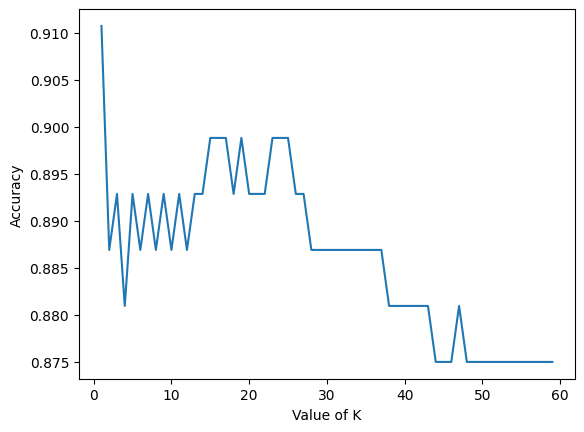

In [12]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(range_k,scores_list)
plt.xlabel("Value of K")
plt.ylabel("Accuracy")

In [13]:
classifier = KNeighborsClassifier(n_neighbors = 16)
classifier.fit(X_train, Y_train)
y_pred = classifier.predict(X_test)

In [14]:
result = metrics.confusion_matrix(Y_test, y_pred)
print("Confusion Matrix:")
print(result)
result1 = metrics.classification_report(Y_test, y_pred)
print("Classification Report:",)
print (result1)

Confusion Matrix:
[[142   0]
 [ 17   9]]
Classification Report:
              precision    recall  f1-score   support

           0       0.89      1.00      0.94       142
           1       1.00      0.35      0.51        26

    accuracy                           0.90       168
   macro avg       0.95      0.67      0.73       168
weighted avg       0.91      0.90      0.88       168



In [15]:
print("RMSE DT:",np.sqrt(mean_squared_error(Y_test, y_pred)))
print("R2 DT:",r2_score(Y_test, y_pred))
predictions = np.mean(cross_validate(classifier,X_test,Y_test,cv=100)['test_score'])
print('The accuracy is (cross validation*100): ',predictions*100,'%')

RMSE DT: 0.3181045051401759
R2 DT: 0.22643553629469126
The accuracy is (cross validation*100):  88.0 %


c:\Users\ccana\Documents\Python-Environment\Main_Env\lib\site-packages\sklearn\model_selection\_split.py:684: UserWarning: The least populated class in y has only 26 members, which is less than n_splits=100.
  warnings.warn(


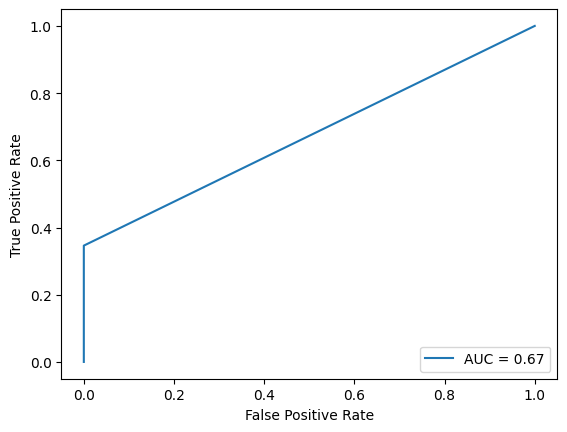

In [16]:
fpr, tpr, _ = roc_curve(Y_test, y_pred)
roc_pls = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=auc(fpr, tpr))
roc_pls.plot()
plt.show()

In [17]:
y_valid=classifier.predict(X_valid)

In [18]:
result = metrics.confusion_matrix(Y_valid, y_valid)
print("Confusion Matrix:")
print(result)
result1 = metrics.classification_report(Y_valid, y_valid)
print("Classification Report:",)
print (result1)

Confusion Matrix:
[[234   0]
 [ 50  19]]
Classification Report:
              precision    recall  f1-score   support

           0       0.82      1.00      0.90       234
           1       1.00      0.28      0.43        69

    accuracy                           0.83       303
   macro avg       0.91      0.64      0.67       303
weighted avg       0.86      0.83      0.80       303



In [19]:
print("RMSE DT:",np.sqrt(mean_squared_error(Y_valid, y_valid)))
print("R2 DT:",r2_score(Y_valid, y_valid))
predictions = np.mean(cross_validate(classifier,X_valid,Y_valid,cv=100)['test_score'])
print('Cross Validation:', predictions)
print('The accuracy is: ',predictions*100,'%')

RMSE DT: 0.40622223185119377
R2 DT: 0.06168710516536613
Cross Validation: 0.8175000000000001
The accuracy is:  81.75000000000001 %


c:\Users\ccana\Documents\Python-Environment\Main_Env\lib\site-packages\sklearn\model_selection\_split.py:684: UserWarning: The least populated class in y has only 69 members, which is less than n_splits=100.
  warnings.warn(


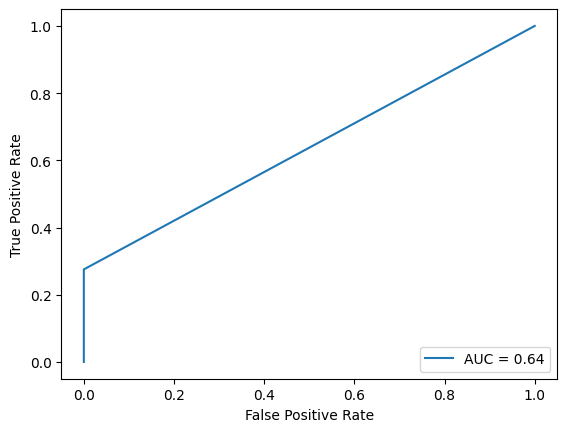

In [20]:
fpr, tpr, _ = roc_curve(Y_valid, y_valid)
roc_pls = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=auc(fpr, tpr))
roc_pls.plot()
plt.show()

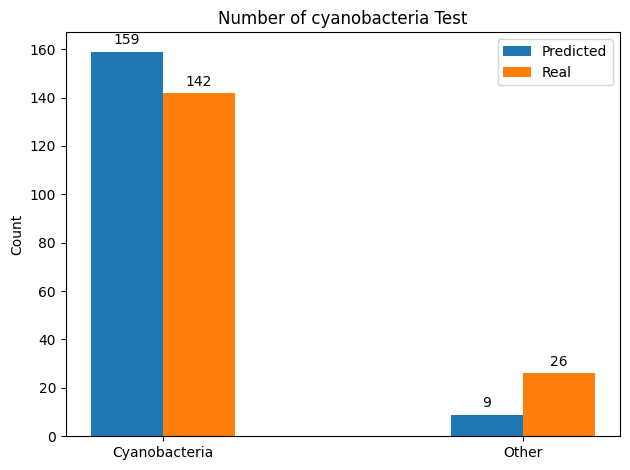

In [21]:
y_pred_list= y_pred.tolist()
Y_test_list=Y_test.tolist()

labels = ['Cyanobacteria', 'Other']
predicted = [y_pred_list.count(0),y_pred_list.count(1)]
real=[Y_test_list.count(0),Y_test_list.count(1)]

x = np.arange(len(labels))  # the label locations
width = 0.2  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, predicted, width, label='Predicted')
rects2 = ax.bar(x + width/2, real, width, label='Real')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Count')
ax.set_title('Number of cyanobacteria Test')
ax.set_xticks(x, labels)
ax.legend()

ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)

fig.tight_layout()

plt.show()

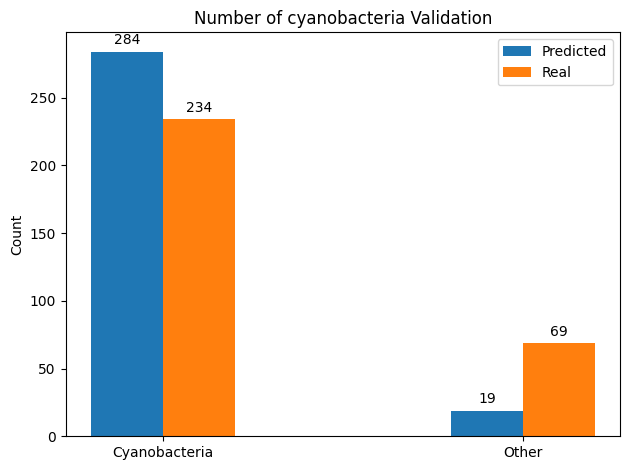

In [22]:
y_valid_list= y_valid.tolist()
Y_valid_list=Y_valid.tolist()

labels = ['Cyanobacteria', 'Other']
predicted_v = [y_valid_list.count(0),y_valid_list.count(1)]
real_v=[Y_valid_list.count(0),Y_valid_list.count(1)]

x = np.arange(len(labels))  # the label locations
width = 0.2  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, predicted_v, width, label='Predicted')
rects2 = ax.bar(x + width/2, real_v, width, label='Real')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Count')
ax.set_title('Number of cyanobacteria Validation')
ax.set_xticks(x, labels)
ax.legend()

ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)

fig.tight_layout()

plt.show()